In [ ]:
import pandas as pd
import numpy as np
import os
import glob as glob
from tqdm.notebook import tqdm

from scipy import signal
import matplotlib.pyplot as plt,

In [3]:
ndvi = r"C:\Users\tobyz\Documents\AIT\Thesis\NDVI_export_150.csv"
lswi = r"C:\Users\tobyz\Documents\AIT\Thesis\LSWI_export_150.csv"
nbr = r"C:\Users\tobyz\Documents\AIT\Thesis\NBR_export_150.csv"

In [4]:
class gee_conversion_dataset:
    ''' This is the initial attempt to create STAC by first creating excel file '''
    def __init__(self,filename):
        self.filename= filename
        self.columns = pd.read_csv(filename).columns.tolist()
        self.dimensions = pd.read_csv(filename).shape
    
    def read_excel(self):
        ex_dataset = pd.read_csv(self.filename)
        return ex_dataset
    
    def to_raw_instances(self,pivot_point,time,column,replace_value = np.nan):
        df = pd.read_csv(self.filename)
        result = []
        for point in tqdm(df[pivot_point].unique()):
            pt = df[df[pivot_point] == point]
            instance = pd.DataFrame()
            instance.index = [point]
            instance.index.name = pivot_point
            for ind, date in enumerate(df[time].unique()):
                if date in pt[time].to_numpy():
                    instance[f'{column}_{date}'] = [pt[pt[time] == date][column].to_numpy()[0]]
                else:
                    instance[f'{column}_{date}'] = [replace_value]

            result.append(instance)
        return pd.concat(result)
    
    def to_smooth_instances(self,timestep,pivot_point,time,column,replace_value = np.nan):
        df = pd.read_csv(self.filename)
        result = []
        for point in tqdm(df[pivot_point].unique()):
            pt = df[df[pivot_point] == point]
            instance = pd.DataFrame()
            instance.index = [point]
            instance.index.name = pivot_point
            for ind, date in enumerate(df[time].unique()):
                if date in pt[time].to_numpy():
                    instance[f'{column}_{time}'] = [pt[pt[time] == date][column].to_numpy()[0]]
                else:
                    instance[f'{column}_{time}'] = [replace_value]

            result.append(instance)
        f_df = pd.concat(result)
        f_df = f_df.iloc[:, :timestep].interpolate(method='linear', limit_direction='both', axis=1)
        
        b, a = signal.butter(1, 0.25, btype="lowpass")
        for point in tqdm(f_df.index):
            f_df.loc[point] = signal.filtfilt(b, a, f_df.loc[point])
        return f_df

        
    
    
    
    
    
    def plot(self):
        df = pd.read_csv(self.filename)
        df.plot()
    

# NDVI

In [5]:
ndvi_ds = gee_conversion_dataset(ndvi)
ndvi_ds.read_excel()

,system:index,date,first,.geo
0,1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_...,2022-01-02T04:13:43,-0.054671,"{""type"":""Point"",""coordinates"":[96.206082558045..."
1,1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_...,2022-01-02T04:13:43,0.205507,"{""type"":""Point"",""coordinates"":[96.423230134163..."
2,1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_...,2022-01-02T04:13:43,0.250381,"{""type"":""Point"",""coordinates"":[96.028796109447..."
3,1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_...,2022-01-02T04:13:43,0.234244,"{""type"":""Point"",""coordinates"":[96.107123186860..."
4,1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_...,2022-01-02T04:13:43,0.289777,"{""type"":""Point"",""coordinates"":[96.034180638899..."
...,...,...,...,...
11995,2_95,2023-09-04T04:13:52,0.107250,"{""type"":""Point"",""coordinates"":[96.284998367758..."
11996,2_96,2023-09-04T04:13:52,0.035731,"{""type"":""Point"",""coordinates"":[96.024721672084..."
11997,2_97,2023-09-04T04:13:52,0.090301,"{""type"":""Point"",""coordinates"":[96.360867978208..."
11998,2_98,2023-09-04T04:13:52,0.062819,"{""type"":""Point"",""coordinates"":[96.072171729383..."


  0%|          | 0/100 [00:00<?, ?it/s]

C:\Users\tobyz\anaconda3\envs\imgpc\lib\site-packages\ipykernel_launcher.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


<AxesSubplot:>

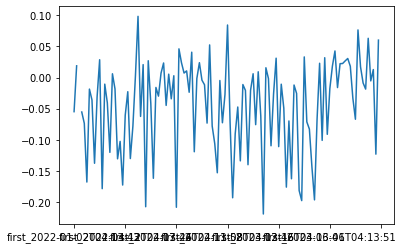

In [6]:
ndvi_ds_0 = ndvi_ds.to_raw_instances(pivot_point='.geo',time='date',column='first')
ndvi_ds_0.iloc[0].plot()

In [7]:
ndvi_ds_0.describe()

,first_2022-01-02T04:13:43,first_2022-01-07T04:13:49,first_2022-01-12T04:13:43,first_2022-01-17T04:13:48,first_2022-01-22T04:13:42,first_2022-01-27T04:13:48,first_2022-02-01T04:13:42,first_2022-02-06T04:13:47,first_2022-02-11T04:13:42,first_2022-02-16T04:13:48,...,first_2023-07-21T04:13:51,first_2023-07-26T04:13:53,first_2023-07-31T04:13:53,first_2023-08-05T04:13:52,first_2023-08-10T04:13:52,first_2023-08-15T04:13:53,first_2023-08-20T04:13:54,first_2023-08-25T04:13:52,first_2023-08-30T04:13:53,first_2023-09-04T04:13:52
count,100.000000,100.000000,6.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.349702,0.347011,0.427627,0.371241,0.384042,0.228103,0.242874,-0.015953,0.202833,0.174065,...,0.100176,0.123981,0.021588,0.138917,0.102642,0.114341,0.232577,0.025941,0.205597,0.080378
std,0.228024,0.250213,0.231770,0.258414,0.257354,0.157133,0.144321,0.105810,0.139772,0.120190,...,0.100736,0.099589,0.003290,0.074724,0.082769,0.049980,0.130781,0.026962,0.214632,0.035847
min,-0.270270,-0.477707,0.185112,-0.354167,-0.343766,-0.167579,-0.067650,-0.190793,-0.188248,-0.066301,...,-0.066861,-0.007841,0.015225,-0.030668,-0.018490,0.029832,-0.032493,-0.010190,-0.145427,0.030527
25%,0.204563,0.195981,0.279353,0.189216,0.209184,0.121786,0.146097,-0.045641,0.125178,0.102820,...,0.022097,0.036971,0.019370,0.092489,0.027891,0.080559,0.130825,0.009125,0.003396,0.054287
50%,0.306160,0.298168,0.344917,0.354806,0.361350,0.208310,0.227113,-0.031383,0.192418,0.151450,...,0.077638,0.109014,0.021028,0.129586,0.091616,0.111375,0.248931,0.021261,0.189203,0.069648
75%,0.491187,0.491850,0.587471,0.558076,0.588398,0.351812,0.337452,-0.017033,0.276870,0.227493,...,0.149283,0.165409,0.023632,0.174398,0.163956,0.141171,0.323451,0.033092,0.399379,0.101251
max,0.865390,0.863038,0.764995,0.863788,0.852743,0.551769,0.547820,0.614951,0.516943,0.505274,...,0.532740,0.534903,0.030028,0.399708,0.319601,0.300391,0.553066,0.134844,0.613722,0.206855


  0%|          | 0/100 [00:00<?, ?it/s]

<AxesSubplot:title={'center':'Rolling Average Window 5 NDVI'}>

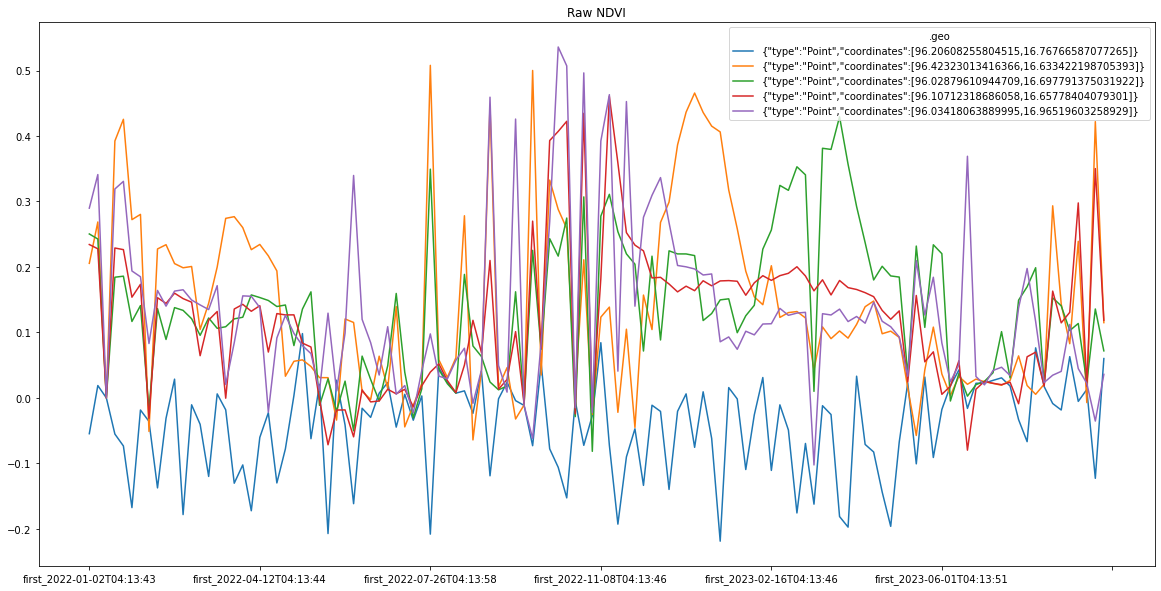

<Figure size 432x288 with 0 Axes>

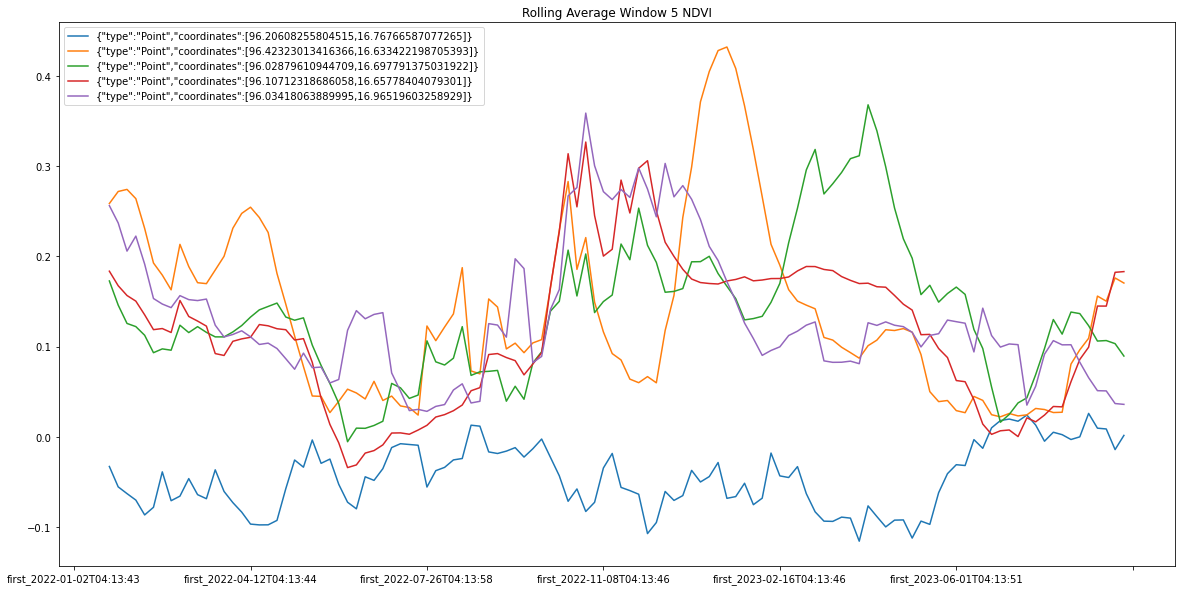

In [7]:
smooth_ds = pd.DataFrame()
ndvi_ds_0 = ndvi_ds_0.fillna(0)

for columns in tqdm(ndvi_ds_0.T.columns):
    smooth_ds[f'{columns}']= ndvi_ds_0.T[columns].rolling(5).mean()
    
smooth_ds= smooth_ds.T



ndvi_ds_0.head(5).T.plot(legend= True,figsize=(20,10),title='Raw NDVI')
plt.figure()
smooth_ds.head(5).T.plot(legend= True,figsize=(20,10),title='Rolling Average Window 5 NDVI')

  0%|          | 0/100 [00:00<?, ?it/s]

C:\Users\tobyz\anaconda3\envs\imgpc\lib\site-packages\ipykernel_launcher.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


  0%|          | 0/100 [00:00<?, ?it/s]

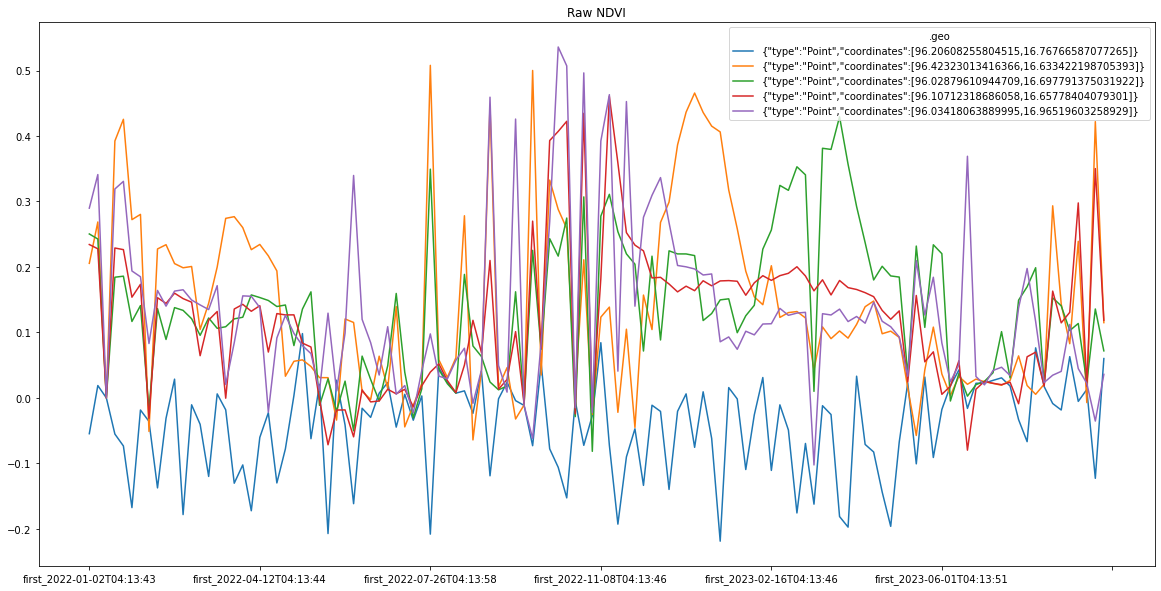

<Figure size 432x288 with 0 Axes>

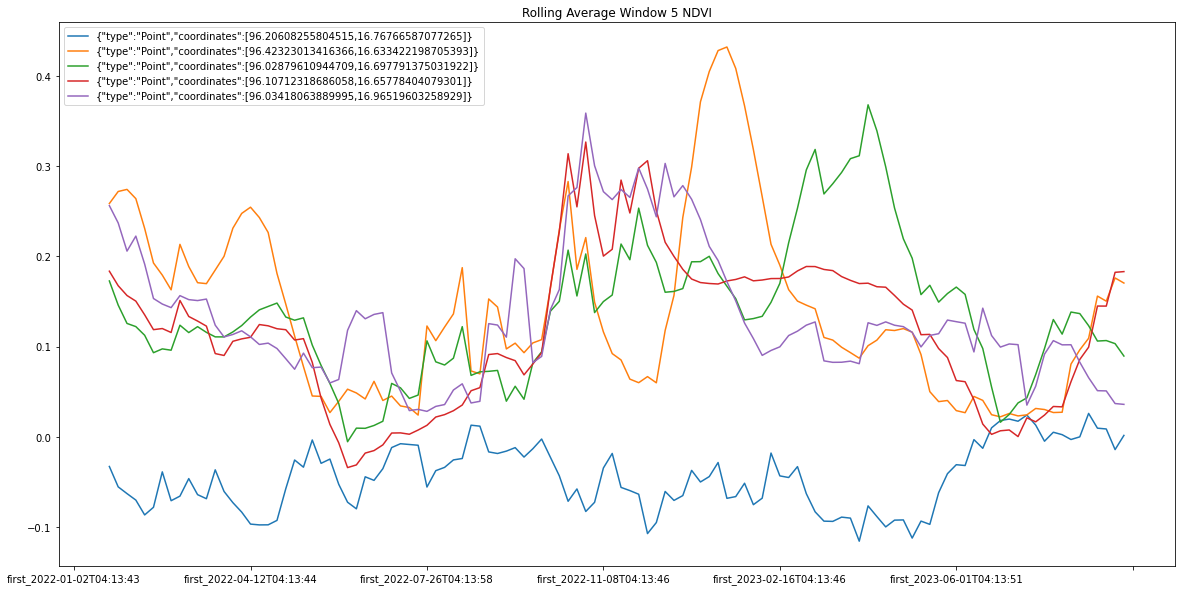

In [8]:
ndvi_ds = gee_conversion_dataset(ndvi)
ndvi_ds.read_excel()

ndvi_ds_0 = ndvi_ds.to_raw_instances(pivot_point='.geo',time='date',column='first')



smooth_ds = pd.DataFrame()
ndvi_ds_0 = ndvi_ds_0.fillna(0)

for columns in tqdm(ndvi_ds_0.T.columns):
    smooth_ds[f'{columns}']= ndvi_ds_0.T[columns].rolling(5).mean()
    
smooth_ds= smooth_ds.T



ndvi_ds_0.head(5).T.plot(legend= True,figsize=(20,10),title='Raw NDVI')
plt.figure()
smooth_ds.head(5).T.plot(legend= True,figsize=(20,10),title='Rolling Average Window 5 NDVI')

smooth_ds.to_csv(r'C:\Users\tobyz\Desktop\Crop_calendar\Smooth_ndvi.csv')

# LSWI

  0%|          | 0/100 [00:00<?, ?it/s]

C:\Users\tobyz\anaconda3\envs\imgpc\lib\site-packages\ipykernel_launcher.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


  0%|          | 0/100 [00:00<?, ?it/s]

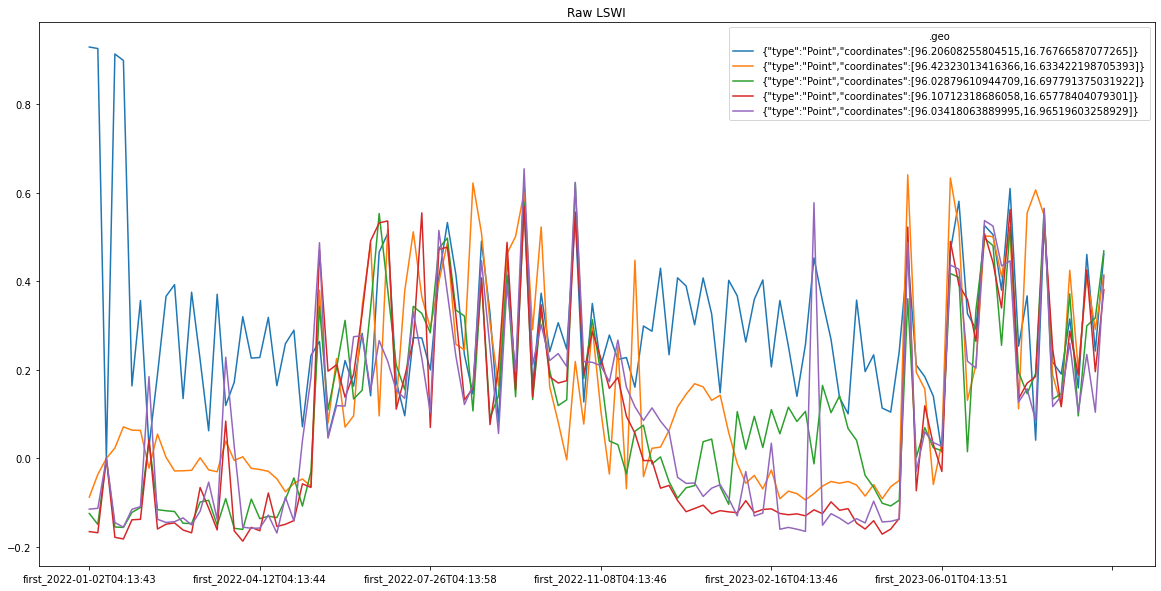

<Figure size 432x288 with 0 Axes>

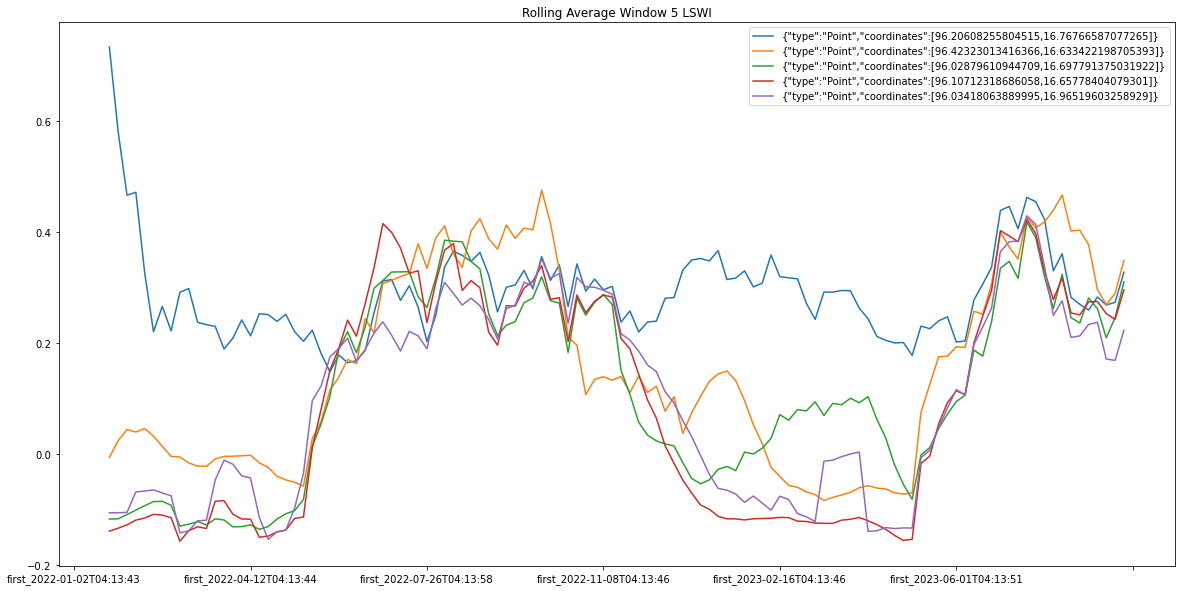

In [9]:
lswi_ds = gee_conversion_dataset(lswi)
lswi_ds.read_excel()

lswi_ds_0 = lswi_ds.to_raw_instances(pivot_point='.geo',time='date',column='first')
#lswi_ds_0.iloc[0].plot()


smooth_lswi_ds = pd.DataFrame()
lswi_ds_0 = lswi_ds_0.fillna(0)

for columns in tqdm(lswi_ds_0.T.columns):
    smooth_lswi_ds[f'{columns}']= lswi_ds_0.T[columns].rolling(5).mean()
    
smooth_lswi_ds= smooth_lswi_ds.T



lswi_ds_0.head(5).T.plot(legend= True,figsize=(20,10),title='Raw LSWI')
plt.figure()
smooth_lswi_ds.head(5).T.plot(legend= True,figsize=(20,10),title='Rolling Average Window 5 LSWI')

smooth_lswi_ds.to_csv(r'C:\Users\tobyz\Desktop\Crop_calendar\Smooth_lswi.csv')

# NBR

  0%|          | 0/100 [00:00<?, ?it/s]

C:\Users\tobyz\anaconda3\envs\imgpc\lib\site-packages\ipykernel_launcher.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


  0%|          | 0/100 [00:00<?, ?it/s]

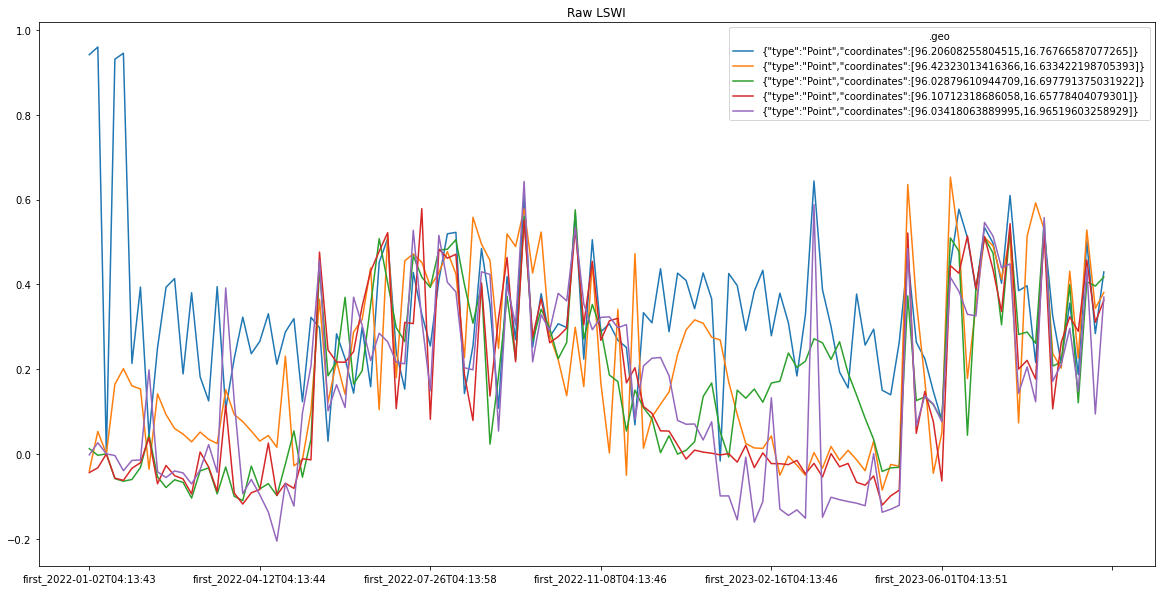

<Figure size 432x288 with 0 Axes>

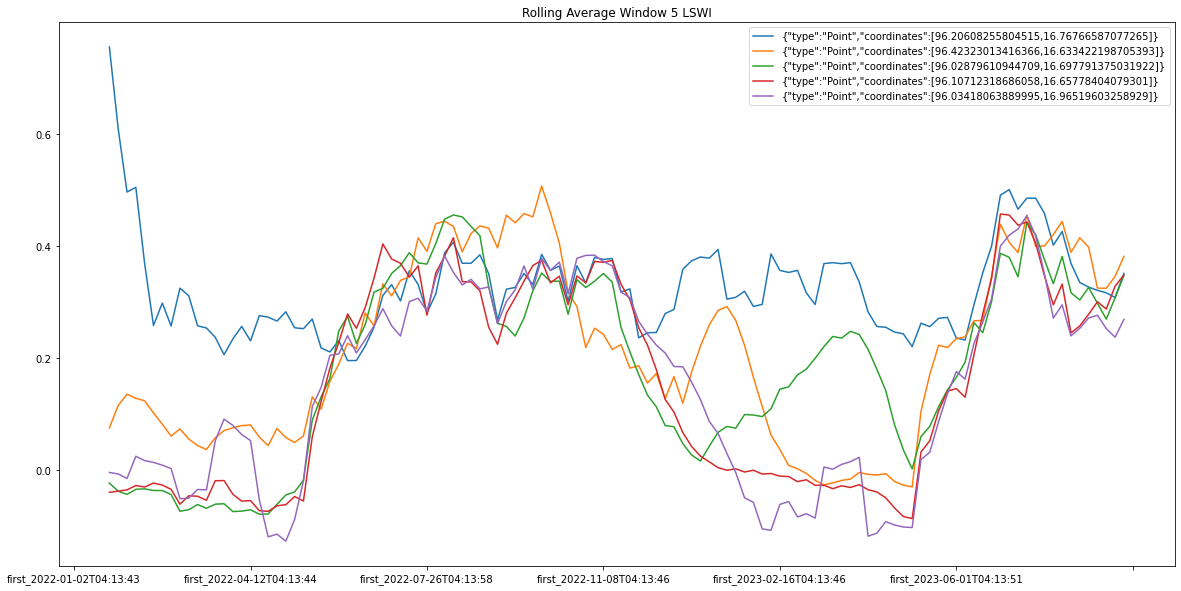

In [10]:
nbr_ds = gee_conversion_dataset(nbr)
nbr_ds.read_excel()

nbr_ds_0 = nbr_ds.to_raw_instances(pivot_point='.geo',time='date',column='first')
#lswi_ds_0.iloc[0].plot()


smooth_nbr_ds = pd.DataFrame()
nbr_ds_0 = nbr_ds_0.fillna(0)

for columns in tqdm(nbr_ds_0.T.columns):
    smooth_nbr_ds[f'{columns}']= nbr_ds_0.T[columns].rolling(5).mean()
    
smooth_nbr_ds= smooth_nbr_ds.T



nbr_ds_0.head(5).T.plot(legend= True,figsize=(20,10),title='Raw LSWI')
plt.figure()
smooth_nbr_ds.head(5).T.plot(legend= True,figsize=(20,10),title='Rolling Average Window 5 LSWI')

smooth_nbr_ds.to_csv(r'C:\Users\tobyz\Desktop\Crop_calendar\Smooth_nbr.csv')

# NDVI and NBR plotting

In [11]:
smooth_ndvi_ds = smooth_ds

In [12]:
ndvi_arr = []
nbr_arr = []
point_name_arr = []
for point,point2 in tqdm(zip(smooth_ndvi_ds.iterrows(),smooth_nbr_ds.iterrows())):
    point_name = point[0]
    point2_name = point2[0]
    if point_name==point2_name:
        #print(True)
        ndvi_arr.append(point[1].values)
        nbr_arr.append(point2[1].values)
        point_name_arr.append(point_name)

ndvi_arr = np.asarray(ndvi_arr)
nbr_arr = np.asarray(nbr_arr)

0it [00:00, ?it/s]

# Date time grapping

In [13]:
datetime = ndvi_ds_0.columns.tolist()
date = []
for i in datetime:
    date.append(i.split('_')[1].split('T')[0])

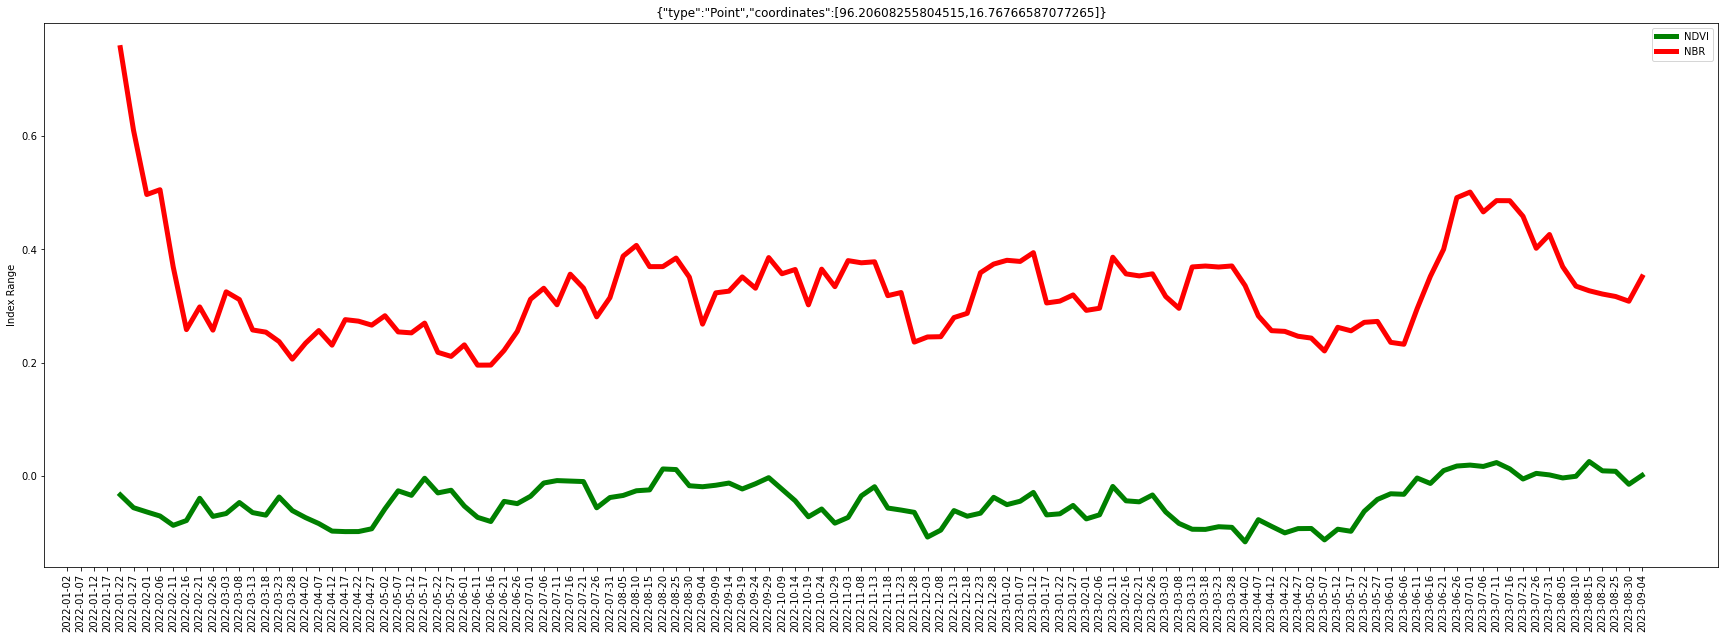

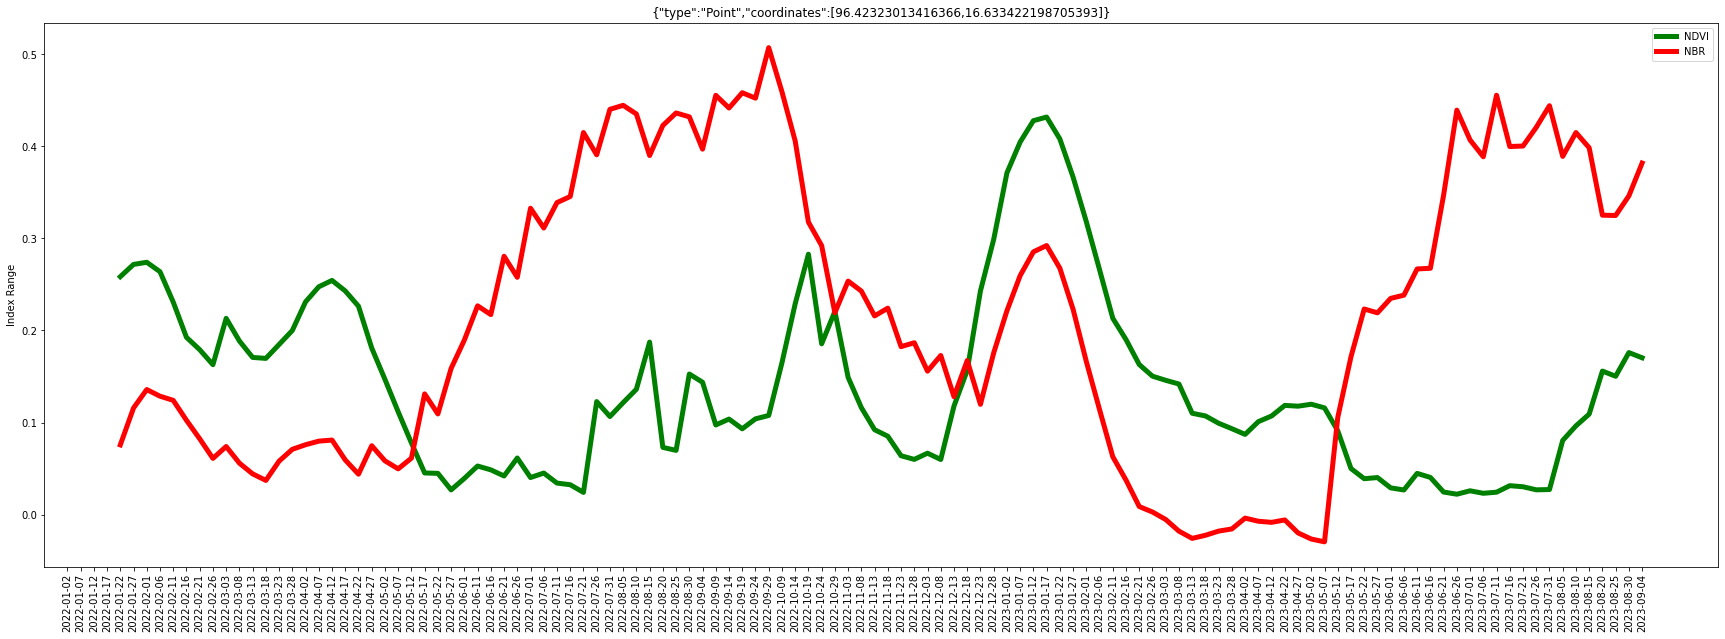

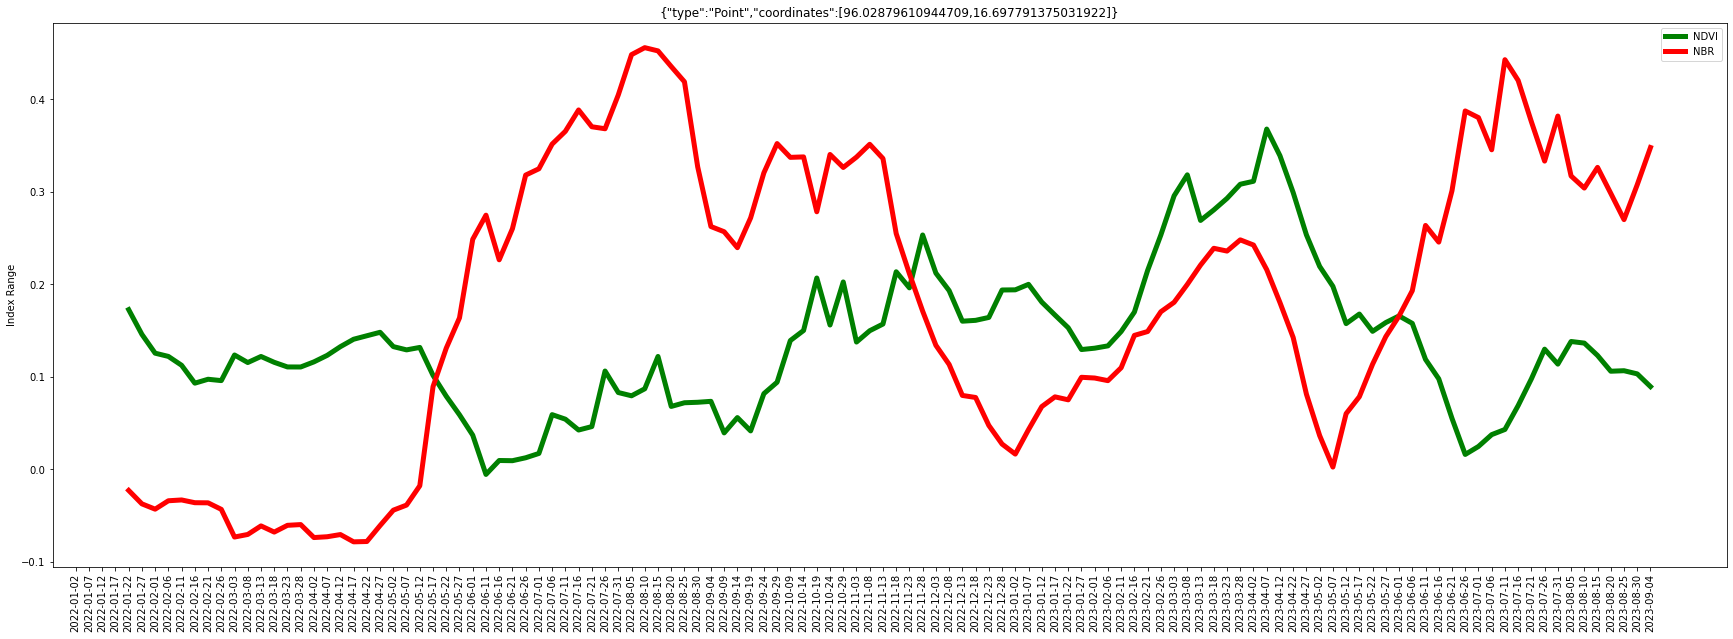

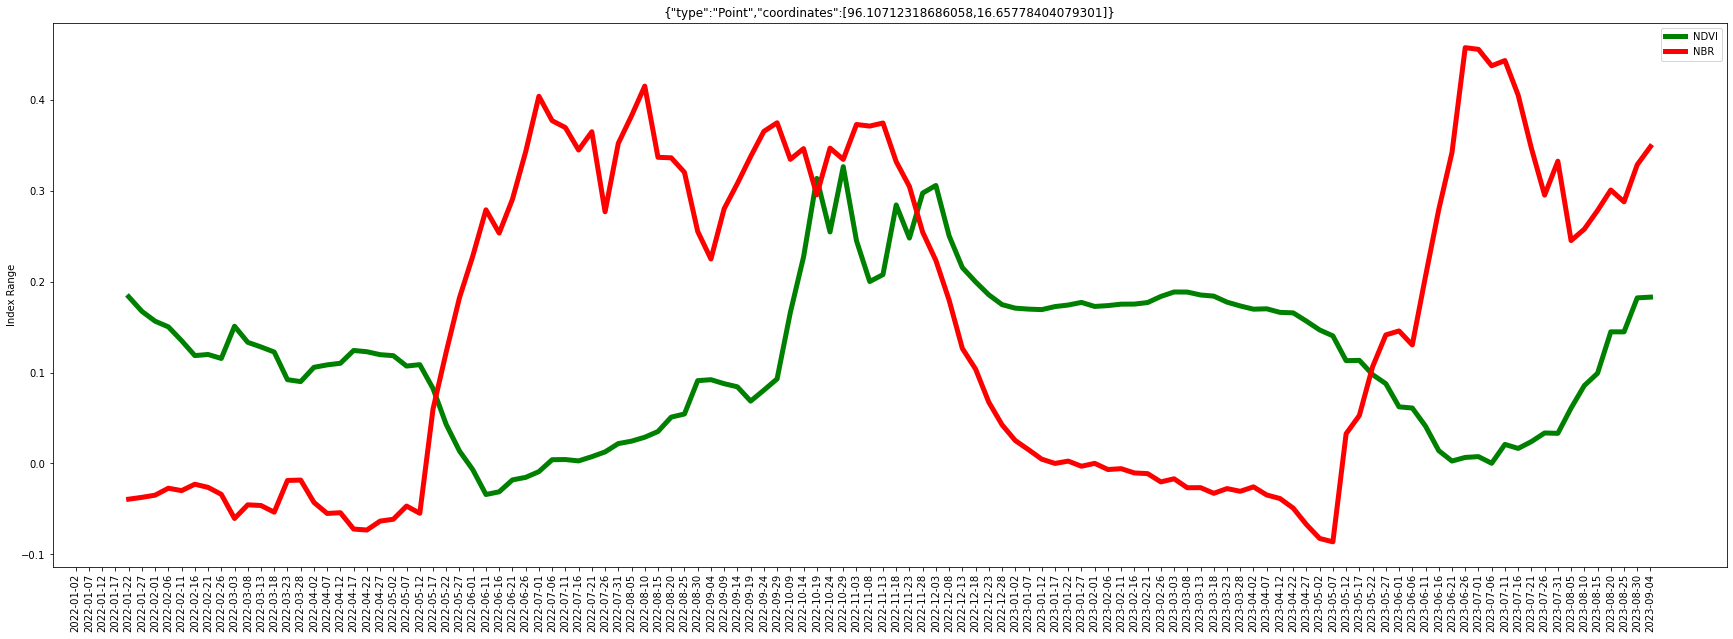

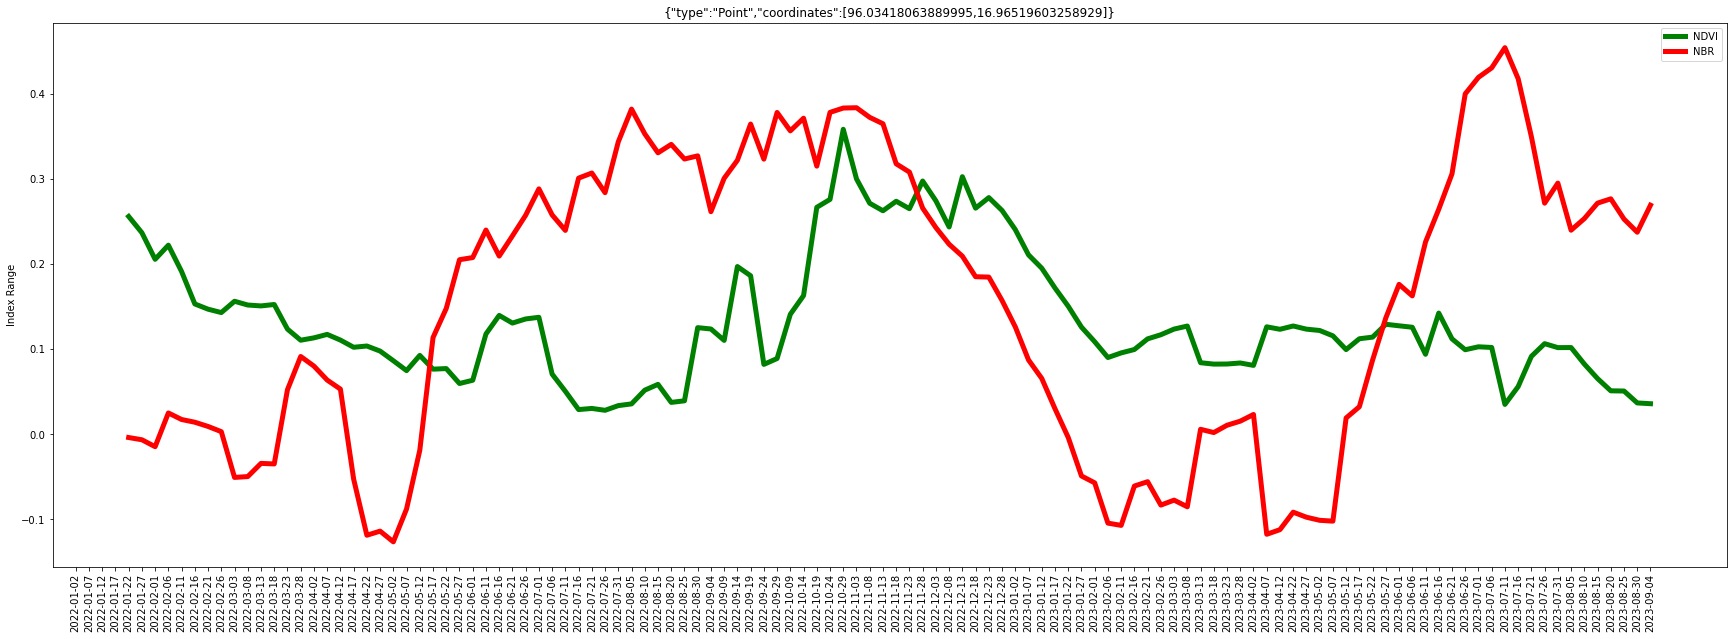

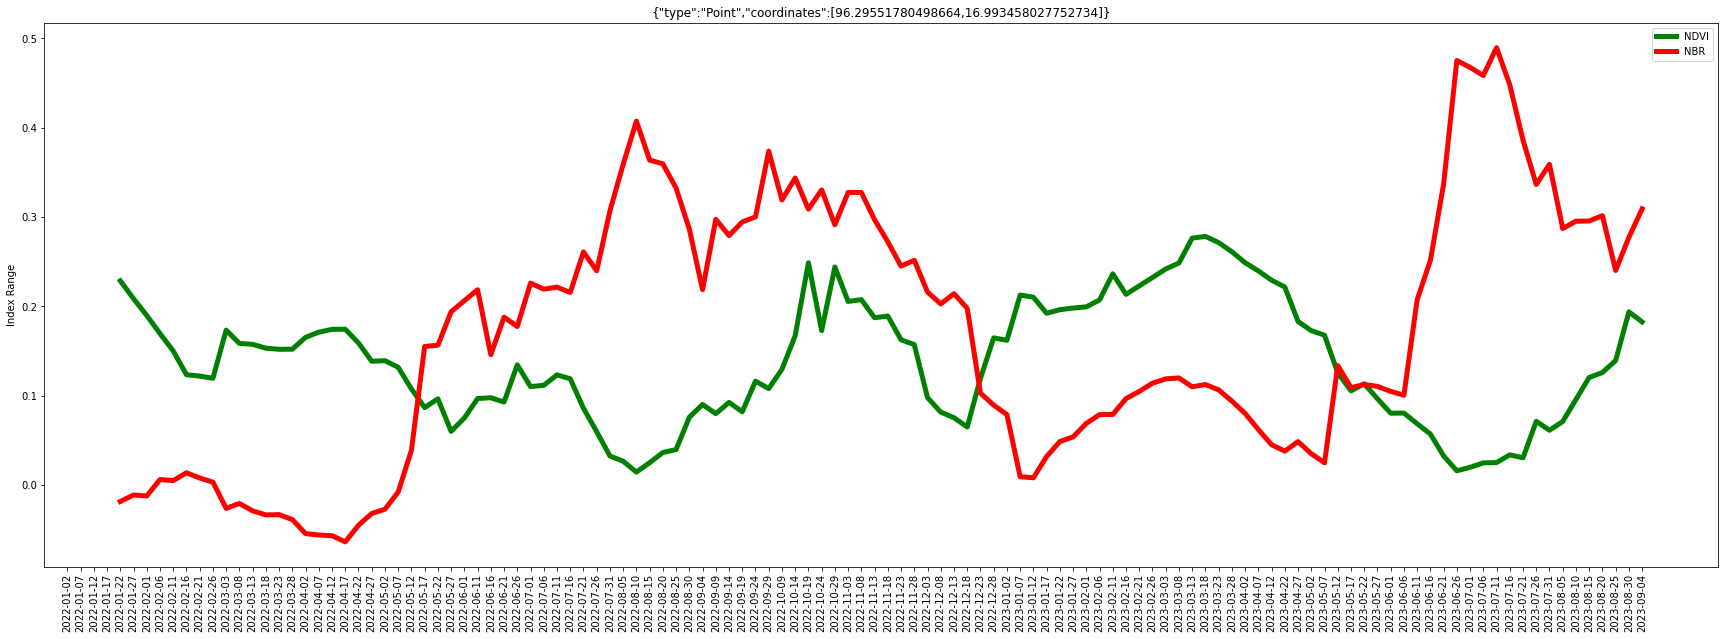

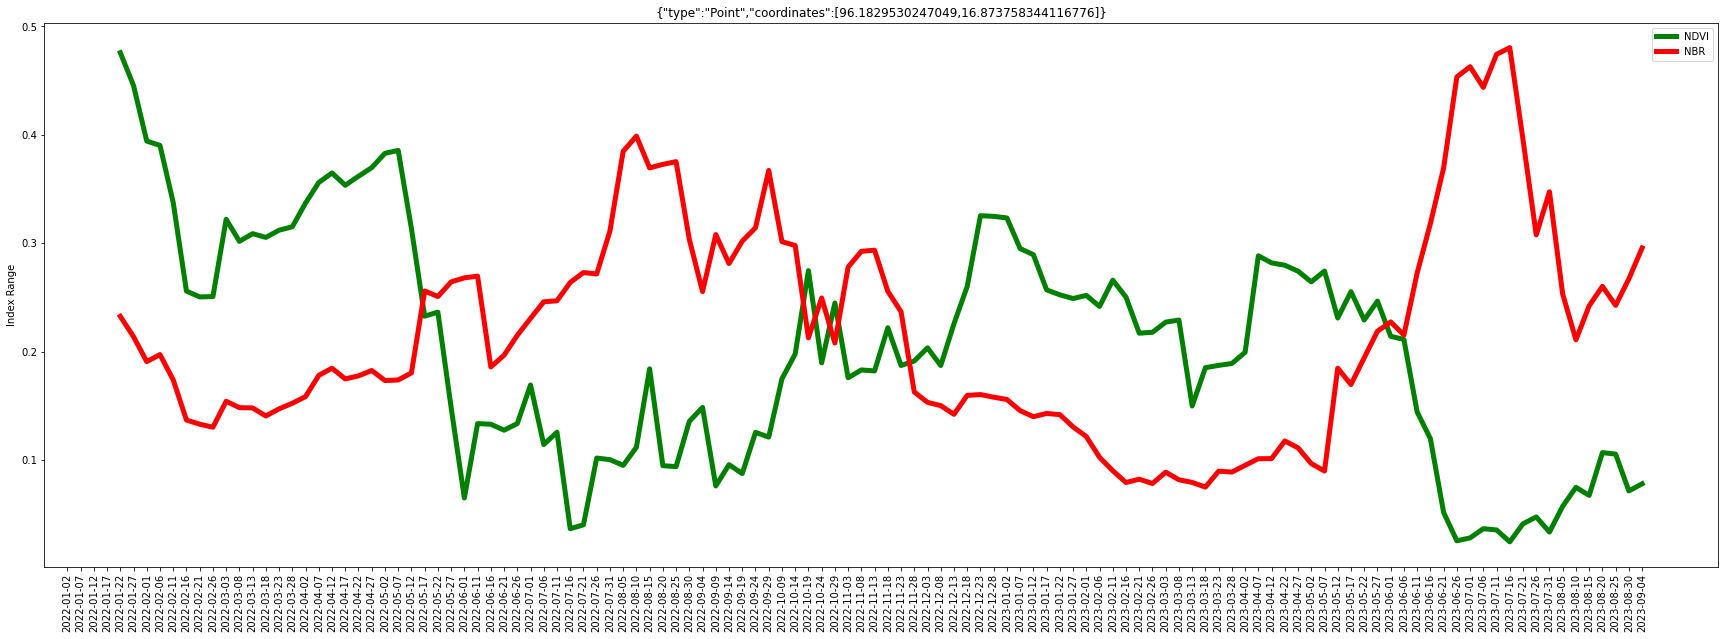

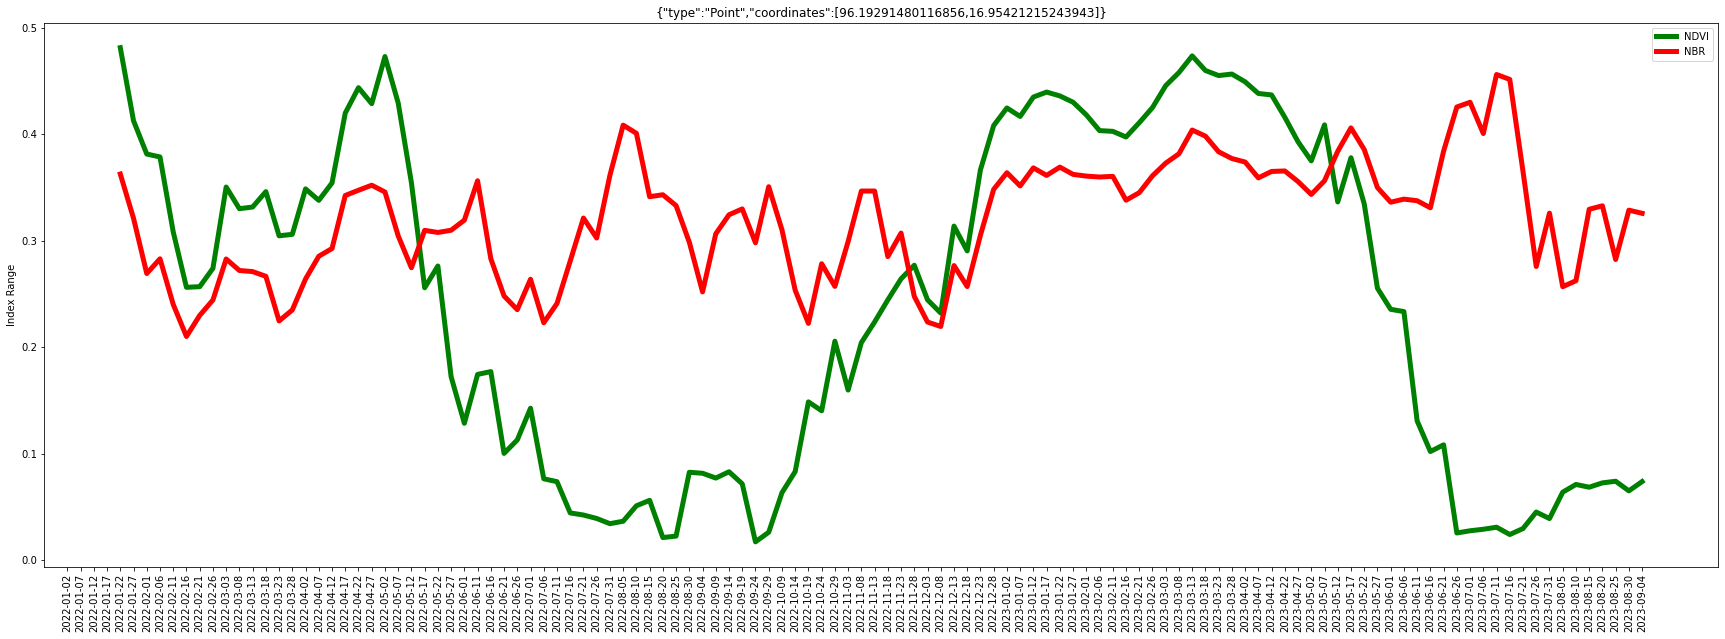

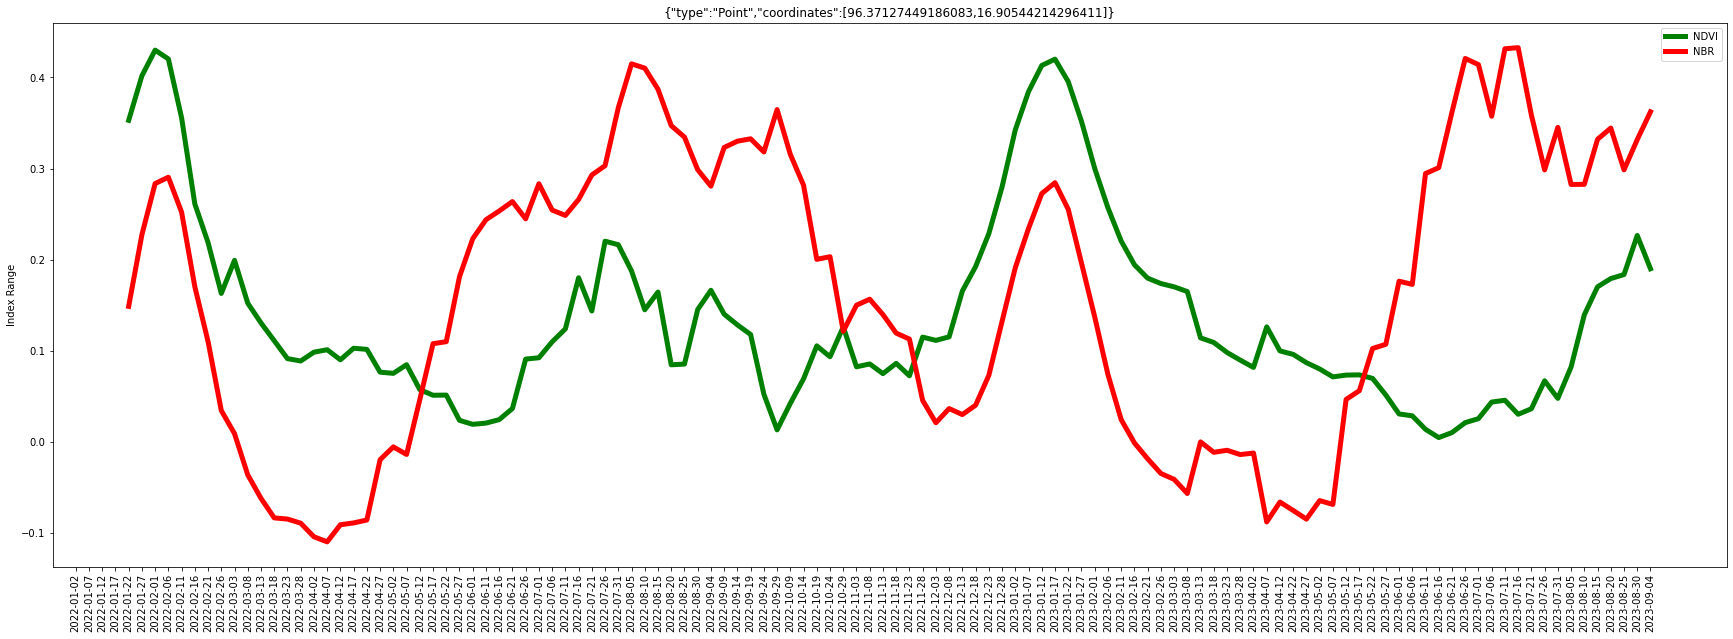

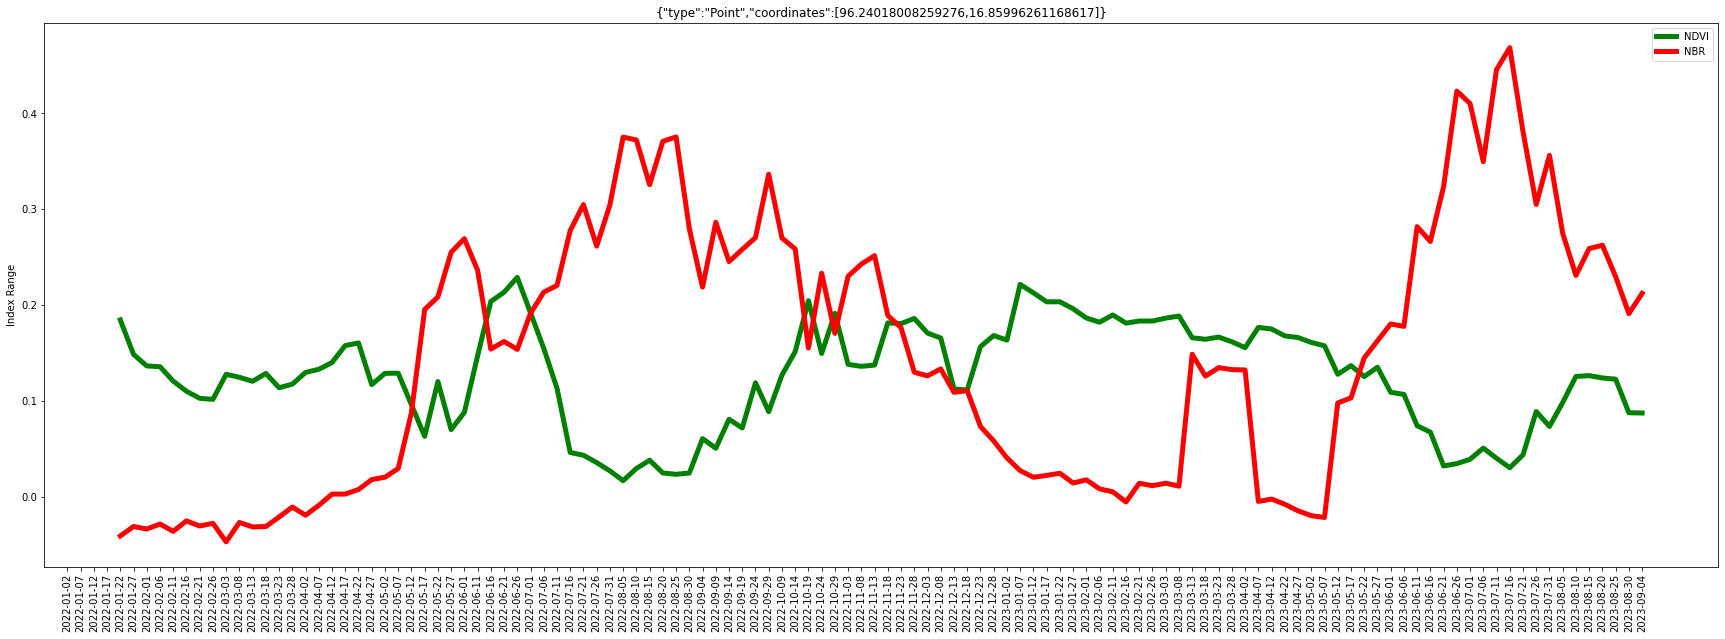

In [14]:
for i in range(10):
    plt.figure(figsize=(30,10))
    plt.plot(date,ndvi_arr[i],label='NDVI',linewidth=5,alpha=1,color='green')
    plt.plot(date,nbr_arr[i],label='NBR',linewidth=5,alpha=1,color='red')
    plt.legend()
    plt.title(point_name_arr[i])
    plt.xticks(rotation = 90) 
    plt.ylabel('Index Range')
    

In [13]:
burnt= []

def has_value_in_range(arr):
    for value in arr:
        if -0.1 < value <0.1:
            return 1  # Return 1 if any value in the range is found
    return 0  # Return 0 if no value in the range is found


for i,j in zip(ndvi_arr,nbr_arr):
    difference = np.unique(i-j)
    print(f'{np.nanmin(difference)},{np.nanmax(difference)}')
    burn_val = has_value_in_range(difference)
    print(burn_val)
    burnt.append(burn_val)

-0.7884786463661323,-0.23598822461662872
0
-0.4312690560763967,0.18360560551128477
1
-0.39964341896139505,0.2223713521018553
1
-0.45082215074166515,0.22938747423458083
1
-0.41950662332226796,0.2599630037212594
1
-0.4644090882819061,0.2470070919953291
1
-0.45596326451370867,0.24329450016808846
1
-0.427469358020637,0.1272152852258352
1
-0.40254407082198473,0.22170302590539645
1
-0.4381120491166004,0.22531892988183616
1
-0.7926131086164954,-0.23311350550936036
0
-0.40778527465127545,0.231853306324599
1
-0.47422119055145817,0.33278644989314166
1
-0.4511406226374732,0.25873852449639384
1
-0.4175614892609435,0.2358729498323065
1
-0.4243938317121808,0.08794601042835987
1
-0.4268888591426733,0.19991650531792277
1
-0.4611234600415867,0.16302293191485778
1
-0.4789243962345413,0.2380214510206295
1
-0.40176857997256177,0.26507473956089456
1
-0.41399723845508885,-0.05856398801614182
1
-0.4383900473584123,0.25973244106238325
1
-0.4593899414725595,0.2894494998811561
1
-0.4331456663466956,0.2162439631

In [14]:
burnt_arr = np.asarray(burnt)
burnt_arr.shape

(100,)

In [16]:
x = []
y = []

for i in point_name_arr:
    x.append(i.split('[')[1].split(']')[0].split(',')[0])
    y.append(i.split('[')[1].split(']')[0].split(',')[1])

burnt_dataframe = pd.DataFrame()
burnt_dataframe['Point'] = point_name_arr

burnt_dataframe['X'] =x
burnt_dataframe['Y'] =y
burnt_dataframe['Burnt_Boolean'] = burnt_arr
burnt_dataframe

,Point,X,Y,Burnt_Boolean
0,"{""type"":""Point"",""coordinates"":[96.206082558045...",96.20608255804515,16.76766587077265,0
1,"{""type"":""Point"",""coordinates"":[96.423230134163...",96.42323013416366,16.633422198705393,1
2,"{""type"":""Point"",""coordinates"":[96.028796109447...",96.02879610944709,16.697791375031922,1
3,"{""type"":""Point"",""coordinates"":[96.107123186860...",96.10712318686058,16.65778404079301,1
4,"{""type"":""Point"",""coordinates"":[96.034180638899...",96.03418063889995,16.96519603258929,1
...,...,...,...,...
95,"{""type"":""Point"",""coordinates"":[96.284998367758...",96.28499836775873,16.76683988371839,1
96,"{""type"":""Point"",""coordinates"":[96.024721672084...",96.02472167208438,16.94385635201373,1
97,"{""type"":""Point"",""coordinates"":[96.360867978208...",96.360867978208,16.756433591490964,1
98,"{""type"":""Point"",""coordinates"":[96.072171729383...",96.07217172938375,16.73161130845803,1


array([[<AxesSubplot:title={'center':'Burnt_Boolean'}>]], dtype=object)

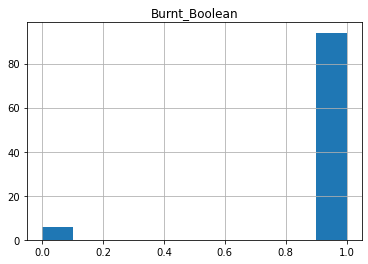

In [17]:
burnt_dataframe.hist()

In [18]:
burnt_dataframe.to_csv(r"C:\Users\tobyz\Documents\AIT\Thesis\burnt_pt_X_Y.csv")